## import dataset
Import dataset

Create label

Drop rows with Nans in label

Change column surgmonth to numeric

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

In [3]:
data = pd.read_csv('National_INFRA_2015-07-01.csv')
data.head()

,PATIENTID,PRIMPROCID,LTFCALC,SURGMONTH,SURGYEAR,SURGWEEKDAY,SSDI_MORTYEAR,VQI_MORTYEAR,ALL_MORTYEAR,DEAD,GENDER,RACE,ETHNICITY,HTIN,HTCM,WTLB,WTKG,AGE,AGECAT,LOS,LOS2,PROC_SURVIVALDAYS,LATESTLTFDAYS,PRIMARYINSURER,DCSTATUS,DCNOTHOME,TRANSFER,TRANSFERALL,SMOKING,ANYSMOKE,HTN,DIABETES,ANYDM,HBA1C,CAD,ANYCAD,CABG,PCI,ANYCBGPCI,CHF,ANYCHF,COPD,ANYCOPD,DIALYSIS,CREATININE,CREATININE_UMOL,YNCREAT,STRESS,ALLSTRESS,LIVING,PREOPAMBUL,ASACLASS,HGB,HEMO_L,HXBYPASS,HXCEACAS,HXANEURREP,HXPVI,HXMAJORAMP,PRE_OP_ASA,PRE_OP_P2Y12_ANTAGONIST,ASAP2Y12ANT,PRE_OP_STATIN,PRE_OP_BETA_BLOCKER,ANYBB,PRE_OP_ACE_I_ARB,PRE_OP_ANTICOAGULANT,INDICATIONRT,INDICATIONLT,PATHOLOGYRT,PATHOLOGYLT,PINBYPASSR,PINBYPASSL,PINPTASTENTR,PINPTASTENTL,PLEGBYPASSR,PLEGBYPASSL,PLEGPTASTENTR,PLEGPTASTENTL,PMAJAMPR,PMAJAMPL,PMINAMPR,PMINAMPL,PREOPABIR,PREOPABIL,PREOPTBIR,PREOPTBIL,PREDUPLEX,PREMRA,PRECTA,PREARTERIO,PREVEINMAP,URGENCY,ANESTHESIA,SIDE,SKINPREP,GRAFTORIGIN,GRAFTRECIPIENT,GRAFTVEINTYPE,VEINSEGS,PROSTHETIC,EBL,GROIN_INCISION,TOTALPROCTIME,VEIN_HARVEST_INCISION,VEIN_GRAFT_LOCATION,VEINCUFF,SEQGRAFT,CCPVI,CCENDAR,CCSUPRAINGUINAL,DOPPLER,DUPLEX,ARTERIOGRAM,WOUND,GRFTINFECTION,TRANSFUSION,YNTRANSFX,NEWMI,ANYPOMI,DYSRHYTHMIA,CHF2,RESPIRATORY,CHGRENAL,STROKE,IPSAMP,DCPATENCY,DCPATJUDGE,RTOR,ORBLEED,ORTHROMB,ORINFECTION,ORREVISION,POCX_INFRA,DISCHARGE_ASA,DISCHARGE_STATIN,DISCHARGE_P2Y12_ANTAGONIST,DISCHARGE_BETA_BLOCKER,DISCHARGE_ACE_I_ARB,DISCHARGE_ANTICOAGULANT,POSTOPABIR,POSTOPABIL,POSTOPTBIR,POSTOPTBIL,DCAMBUL,ABXSTART,ABXSTOP,ABXCEPH,SURGEONID,CENTERID,REGIONID,CONTACTBY,LTFSMOKING,LTFSTATUS,MORTCAUSE,LTF_ASA,LTF_P2Y12_ANTAGONIST,LTF_ANTICOAGULANT,LTF_BETA_BLOCKER,LTF_STATIN,LTF_ACE_I_ARB,LTFCURRAMB,LTFIPSSYMP,LTFCURPATENCY,LTFCURPATENCYDAYS,LTFPATJUDGE,LTFIPSABI,LTFIPSTBI,LTFINFECTION,LTFREVISION,LTFREVISIONDAYS,LTFTHROMBREVISION,LTFTHROMBREVISIONDAYS,LTFMAJAMP,LTFMAJAMPDAYS,STROKEORDEATH
0,6,13428,1,DEC,2009,6,NaN,NaN,NaN,0,2.0,5.0,0.0,64.0,163.0,211.0,96.0,61,4,5.0,5.0,1898,305.0,NaN,1.0,0.0,0.0,0.0,2.0,1.0,1.0,2.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.9,79.56,0.0,2.0,2.0,1.0,1.0,3.0,13.8,138.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.66,0.49,0.42,1.0,0.0,0.0,1.0,1.0,1.0,3.0,2.0,NaN,2.0,3.0,1.0,1.0,0.0,300.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,1.0,NaN,0.0,0.98,0.94,0.60,0.46,1.0,1.0,1.0,1.0,9,1,21.0,1.0,1.0,1.0,NaN,1.0,0.0,NaN,1.0,1.0,NaN,1.0,0.0,1.0,305.0,4.0,0.90,0.55,0.0,0.0,305.0,0.0,305.0,0.0,305.0,NaN
1,6,38228,0,NOV,2011,6,NaN,NaN,NaN,0,2.0,5.0,0.0,66.0,168.0,209.0,95.0,63,4,3.0,3.0,1205,53.0,NaN,1.0,0.0,0.0,0.0,2.0,1.0,1.0,2.0,1.0,6.9,1.0,1.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,88.40,0.0,0.0,0.0,1.0,1.0,3.0,11.0,110.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,1.0,NaN,NaN,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.4,0.95,0.25,0.70,1.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,1.0,5.0,4.0,5.0,1.0,0.0,250.0,0.0,330.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,1.0,NaN,0.0,0.90,0.87,0.64,0.54,1.0,1.0,1.0,1.0,9,1,21.0,1.0,1.0,1.0,NaN,1.0,0.0,NaN,1.0,1.0,NaN,1.0,0.0,1.0,53.0,4.0,0.92,0.64,0.0,0.0,53.0,0.0,53.0,0.0,53.0,0.0
2,8,6,0,FEB,2009,3,NaN,NaN,NaN,0,1.0,5.0,0.0,75.0,191.0,279.0,127.0,68,4,17.0,9.0,2202,9.0,NaN,3.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.3,114.92,0.0,0.0,0.0,1.0,1.0,3.0,12.3,123.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,NaN,NaN,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,1.0,3.0,1.0,NaN,5.0,7.0,1.0,1.0,0.0,150.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,2.0,1.0,0.0,1.0,8,1,21.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
df = data.copy()
df.shape

(23242, 176)

In [5]:
df = data.dropna(axis=0, how='any', thresh=None, subset=['CHGRENAL'], inplace=False)
df['AKI'] = df['CHGRENAL'].apply(lambda x: 0 if x == 0 else 1)

/Users/Chen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
df['SURGMONTH'] = df['SURGMONTH'].map({'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
                                       'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12})

/Users/Chen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
df['HTCM'].value_counts()

178.0    1789
170.0    1765
173.0    1763
183.0    1668
175.0    1628
180.0    1610
168.0    1513
165.0    1330
163.0    1167
160.0     996
157.0     837
185.0     773
152.0     608
155.0     583
188.0     576
191.0     276
172.0     275
150.0     235
167.0     225
182.0     225
177.0     225
158.0     206
193.0     184
162.0     161
171.0     155
166.0     148
174.0     120
176.0     114
179.0     108
147.0     104
169.0     102
154.0      99
164.0      92
156.0      89
161.0      89
181.0      82
196.0      79
187.0      69
198.0      56
159.0      49
190.0      49
153.0      43
145.0      43
186.0      42
184.0      35
201.0      34
203.0      31
151.0      30
142.0      30
189.0      27
206.0      22
140.0      22
149.0      22
137.0      10
148.0       9
195.0       8
194.0       6
192.0       6
146.0       6
144.0       5
213.0       5
139.0       5
200.0       5
143.0       4
135.0       4
208.0       4
211.0       3
197.0       3
122.0       3
127.0       2
138.0       2
199.0 

In [8]:
df[df['HTCM']== 66.0]

,PATIENTID,PRIMPROCID,LTFCALC,SURGMONTH,SURGYEAR,SURGWEEKDAY,SSDI_MORTYEAR,VQI_MORTYEAR,ALL_MORTYEAR,DEAD,GENDER,RACE,ETHNICITY,HTIN,HTCM,WTLB,WTKG,AGE,AGECAT,LOS,LOS2,PROC_SURVIVALDAYS,LATESTLTFDAYS,PRIMARYINSURER,DCSTATUS,DCNOTHOME,TRANSFER,TRANSFERALL,SMOKING,ANYSMOKE,HTN,DIABETES,ANYDM,HBA1C,CAD,ANYCAD,CABG,PCI,ANYCBGPCI,CHF,ANYCHF,COPD,ANYCOPD,DIALYSIS,CREATININE,CREATININE_UMOL,YNCREAT,STRESS,ALLSTRESS,LIVING,PREOPAMBUL,ASACLASS,HGB,HEMO_L,HXBYPASS,HXCEACAS,HXANEURREP,HXPVI,HXMAJORAMP,PRE_OP_ASA,PRE_OP_P2Y12_ANTAGONIST,ASAP2Y12ANT,PRE_OP_STATIN,PRE_OP_BETA_BLOCKER,ANYBB,PRE_OP_ACE_I_ARB,PRE_OP_ANTICOAGULANT,INDICATIONRT,INDICATIONLT,PATHOLOGYRT,PATHOLOGYLT,PINBYPASSR,PINBYPASSL,PINPTASTENTR,PINPTASTENTL,PLEGBYPASSR,PLEGBYPASSL,PLEGPTASTENTR,PLEGPTASTENTL,PMAJAMPR,PMAJAMPL,PMINAMPR,PMINAMPL,PREOPABIR,PREOPABIL,PREOPTBIR,PREOPTBIL,PREDUPLEX,PREMRA,PRECTA,PREARTERIO,PREVEINMAP,URGENCY,ANESTHESIA,SIDE,SKINPREP,GRAFTORIGIN,GRAFTRECIPIENT,GRAFTVEINTYPE,VEINSEGS,PROSTHETIC,EBL,GROIN_INCISION,TOTALPROCTIME,VEIN_HARVEST_INCISION,VEIN_GRAFT_LOCATION,VEINCUFF,SEQGRAFT,CCPVI,CCENDAR,CCSUPRAINGUINAL,DOPPLER,DUPLEX,ARTERIOGRAM,WOUND,GRFTINFECTION,TRANSFUSION,YNTRANSFX,NEWMI,ANYPOMI,DYSRHYTHMIA,CHF2,RESPIRATORY,CHGRENAL,STROKE,IPSAMP,DCPATENCY,DCPATJUDGE,RTOR,ORBLEED,ORTHROMB,ORINFECTION,ORREVISION,POCX_INFRA,DISCHARGE_ASA,DISCHARGE_STATIN,DISCHARGE_P2Y12_ANTAGONIST,DISCHARGE_BETA_BLOCKER,DISCHARGE_ACE_I_ARB,DISCHARGE_ANTICOAGULANT,POSTOPABIR,POSTOPABIL,POSTOPTBIR,POSTOPTBIL,DCAMBUL,ABXSTART,ABXSTOP,ABXCEPH,SURGEONID,CENTERID,REGIONID,CONTACTBY,LTFSMOKING,LTFSTATUS,MORTCAUSE,LTF_ASA,LTF_P2Y12_ANTAGONIST,LTF_ANTICOAGULANT,LTF_BETA_BLOCKER,LTF_STATIN,LTF_ACE_I_ARB,LTFCURRAMB,LTFIPSSYMP,LTFCURPATENCY,LTFCURPATENCYDAYS,LTFPATJUDGE,LTFIPSABI,LTFIPSTBI,LTFINFECTION,LTFREVISION,LTFREVISIONDAYS,LTFTHROMBREVISION,LTFTHROMBREVISIONDAYS,LTFMAJAMP,LTFMAJAMPDAYS,STROKEORDEATH,AKI
19931,190461,230909,0,8,2014,7,NaN,NaN,NaN,0,1.0,5.0,1.0,26.0,66.0,198.0,90.0,62,4,14.0,10.0,203,10.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,8.7,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.5,132.6,0.0,0.0,0.0,1.0,2.0,3.0,8.1,81.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,4.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,1.0,2.0,3.0,1.0,5.0,2.0,4.0,2.0,1.0,0.0,200.0,2.0,295.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,2.0,1.0,1.0,1.0,917,37,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10.0,0.0,10.0,0.0,10.0,0.0,0


In [9]:
df = df.drop([19931])
df.shape

(22951, 177)

In [10]:
df[df['HTCM']== 999.0]

,PATIENTID,PRIMPROCID,LTFCALC,SURGMONTH,SURGYEAR,SURGWEEKDAY,SSDI_MORTYEAR,VQI_MORTYEAR,ALL_MORTYEAR,DEAD,GENDER,RACE,ETHNICITY,HTIN,HTCM,WTLB,WTKG,AGE,AGECAT,LOS,LOS2,PROC_SURVIVALDAYS,LATESTLTFDAYS,PRIMARYINSURER,DCSTATUS,DCNOTHOME,TRANSFER,TRANSFERALL,SMOKING,ANYSMOKE,HTN,DIABETES,ANYDM,HBA1C,CAD,ANYCAD,CABG,PCI,ANYCBGPCI,CHF,ANYCHF,COPD,ANYCOPD,DIALYSIS,CREATININE,CREATININE_UMOL,YNCREAT,STRESS,ALLSTRESS,LIVING,PREOPAMBUL,ASACLASS,HGB,HEMO_L,HXBYPASS,HXCEACAS,HXANEURREP,HXPVI,HXMAJORAMP,PRE_OP_ASA,PRE_OP_P2Y12_ANTAGONIST,ASAP2Y12ANT,PRE_OP_STATIN,PRE_OP_BETA_BLOCKER,ANYBB,PRE_OP_ACE_I_ARB,PRE_OP_ANTICOAGULANT,INDICATIONRT,INDICATIONLT,PATHOLOGYRT,PATHOLOGYLT,PINBYPASSR,PINBYPASSL,PINPTASTENTR,PINPTASTENTL,PLEGBYPASSR,PLEGBYPASSL,PLEGPTASTENTR,PLEGPTASTENTL,PMAJAMPR,PMAJAMPL,PMINAMPR,PMINAMPL,PREOPABIR,PREOPABIL,PREOPTBIR,PREOPTBIL,PREDUPLEX,PREMRA,PRECTA,PREARTERIO,PREVEINMAP,URGENCY,ANESTHESIA,SIDE,SKINPREP,GRAFTORIGIN,GRAFTRECIPIENT,GRAFTVEINTYPE,VEINSEGS,PROSTHETIC,EBL,GROIN_INCISION,TOTALPROCTIME,VEIN_HARVEST_INCISION,VEIN_GRAFT_LOCATION,VEINCUFF,SEQGRAFT,CCPVI,CCENDAR,CCSUPRAINGUINAL,DOPPLER,DUPLEX,ARTERIOGRAM,WOUND,GRFTINFECTION,TRANSFUSION,YNTRANSFX,NEWMI,ANYPOMI,DYSRHYTHMIA,CHF2,RESPIRATORY,CHGRENAL,STROKE,IPSAMP,DCPATENCY,DCPATJUDGE,RTOR,ORBLEED,ORTHROMB,ORINFECTION,ORREVISION,POCX_INFRA,DISCHARGE_ASA,DISCHARGE_STATIN,DISCHARGE_P2Y12_ANTAGONIST,DISCHARGE_BETA_BLOCKER,DISCHARGE_ACE_I_ARB,DISCHARGE_ANTICOAGULANT,POSTOPABIR,POSTOPABIL,POSTOPTBIR,POSTOPTBIL,DCAMBUL,ABXSTART,ABXSTOP,ABXCEPH,SURGEONID,CENTERID,REGIONID,CONTACTBY,LTFSMOKING,LTFSTATUS,MORTCAUSE,LTF_ASA,LTF_P2Y12_ANTAGONIST,LTF_ANTICOAGULANT,LTF_BETA_BLOCKER,LTF_STATIN,LTF_ACE_I_ARB,LTFCURRAMB,LTFIPSSYMP,LTFCURPATENCY,LTFCURPATENCYDAYS,LTFPATJUDGE,LTFIPSABI,LTFIPSTBI,LTFINFECTION,LTFREVISION,LTFREVISIONDAYS,LTFTHROMBREVISION,LTFTHROMBREVISIONDAYS,LTFMAJAMP,LTFMAJAMPDAYS,STROKEORDEATH,AKI
7558,54218,47515,0,2,2012,3,NaN,NaN,NaN,0,1.0,5.0,0.0,999.0,999.0,165.0,75.0,64,4,3.0,3.0,1096,3.0,NaN,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.97,85.75,0.0,0.0,0.0,1.0,1.0,3.0,13.4,134.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,5.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,3.0,3.0,2.0,6.0,5.0,4.0,1.0,1.0,0.0,100.0,0.0,215.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,2.0,1.0,1.0,1.0,134,2,21.0,NaN,0.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,312.0,4.0,1.2,NaN,0.0,0.0,312.0,0.0,312.0,0.0,312.0,0.0,0


In [11]:
df = df.drop([7558])
df.shape

(22950, 177)

In [12]:
df['WTKG'].value_counts()

77.0     566
82.0     557
73.0     554
75.0     543
68.0     540
84.0     534
70.0     521
86.0     516
79.0     495
91.0     479
78.0     467
64.0     467
83.0     463
74.0     456
80.0     448
88.0     447
81.0     418
72.0     418
76.0     414
95.0     397
69.0     396
66.0     393
67.0     384
59.0     365
93.0     365
71.0     363
100.0    361
85.0     344
65.0     340
89.0     330
90.0     328
61.0     310
98.0     308
87.0     307
63.0     304
92.0     290
62.0     287
94.0     276
104.0    268
57.0     266
60.0     263
102.0    252
54.0     250
97.0     237
96.0     236
58.0     225
101.0    203
55.0     201
99.0     200
56.0     192
107.0    181
103.0    177
113.0    175
105.0    172
52.0     169
53.0     163
50.0     160
108.0    157
109.0    155
51.0     147
106.0    141
48.0     125
111.0    125
110.0    116
49.0     115
114.0    106
118.0    105
112.0     99
47.0      91
45.0      87
123.0     83
115.0     83
120.0     76
116.0     74
44.0      71
122.0     69
46.0      69

In [13]:
df['bmi'] = df['WTKG']/(df['HTCM']/100)**2

In [14]:
df.head()

,PATIENTID,PRIMPROCID,LTFCALC,SURGMONTH,SURGYEAR,SURGWEEKDAY,SSDI_MORTYEAR,VQI_MORTYEAR,ALL_MORTYEAR,DEAD,GENDER,RACE,ETHNICITY,HTIN,HTCM,WTLB,WTKG,AGE,AGECAT,LOS,LOS2,PROC_SURVIVALDAYS,LATESTLTFDAYS,PRIMARYINSURER,DCSTATUS,DCNOTHOME,TRANSFER,TRANSFERALL,SMOKING,ANYSMOKE,HTN,DIABETES,ANYDM,HBA1C,CAD,ANYCAD,CABG,PCI,ANYCBGPCI,CHF,ANYCHF,COPD,ANYCOPD,DIALYSIS,CREATININE,CREATININE_UMOL,YNCREAT,STRESS,ALLSTRESS,LIVING,PREOPAMBUL,ASACLASS,HGB,HEMO_L,HXBYPASS,HXCEACAS,HXANEURREP,HXPVI,HXMAJORAMP,PRE_OP_ASA,PRE_OP_P2Y12_ANTAGONIST,ASAP2Y12ANT,PRE_OP_STATIN,PRE_OP_BETA_BLOCKER,ANYBB,PRE_OP_ACE_I_ARB,PRE_OP_ANTICOAGULANT,INDICATIONRT,INDICATIONLT,PATHOLOGYRT,PATHOLOGYLT,PINBYPASSR,PINBYPASSL,PINPTASTENTR,PINPTASTENTL,PLEGBYPASSR,PLEGBYPASSL,PLEGPTASTENTR,PLEGPTASTENTL,PMAJAMPR,PMAJAMPL,PMINAMPR,PMINAMPL,PREOPABIR,PREOPABIL,PREOPTBIR,PREOPTBIL,PREDUPLEX,PREMRA,PRECTA,PREARTERIO,PREVEINMAP,URGENCY,ANESTHESIA,SIDE,SKINPREP,GRAFTORIGIN,GRAFTRECIPIENT,GRAFTVEINTYPE,VEINSEGS,PROSTHETIC,EBL,GROIN_INCISION,TOTALPROCTIME,VEIN_HARVEST_INCISION,VEIN_GRAFT_LOCATION,VEINCUFF,SEQGRAFT,CCPVI,CCENDAR,CCSUPRAINGUINAL,DOPPLER,DUPLEX,ARTERIOGRAM,WOUND,GRFTINFECTION,TRANSFUSION,YNTRANSFX,NEWMI,ANYPOMI,DYSRHYTHMIA,CHF2,RESPIRATORY,CHGRENAL,STROKE,IPSAMP,DCPATENCY,DCPATJUDGE,RTOR,ORBLEED,ORTHROMB,ORINFECTION,ORREVISION,POCX_INFRA,DISCHARGE_ASA,DISCHARGE_STATIN,DISCHARGE_P2Y12_ANTAGONIST,DISCHARGE_BETA_BLOCKER,DISCHARGE_ACE_I_ARB,DISCHARGE_ANTICOAGULANT,POSTOPABIR,POSTOPABIL,POSTOPTBIR,POSTOPTBIL,DCAMBUL,ABXSTART,ABXSTOP,ABXCEPH,SURGEONID,CENTERID,REGIONID,CONTACTBY,LTFSMOKING,LTFSTATUS,MORTCAUSE,LTF_ASA,LTF_P2Y12_ANTAGONIST,LTF_ANTICOAGULANT,LTF_BETA_BLOCKER,LTF_STATIN,LTF_ACE_I_ARB,LTFCURRAMB,LTFIPSSYMP,LTFCURPATENCY,LTFCURPATENCYDAYS,LTFPATJUDGE,LTFIPSABI,LTFIPSTBI,LTFINFECTION,LTFREVISION,LTFREVISIONDAYS,LTFTHROMBREVISION,LTFTHROMBREVISIONDAYS,LTFMAJAMP,LTFMAJAMPDAYS,STROKEORDEATH,AKI,bmi
0,6,13428,1,12,2009,6,NaN,NaN,NaN,0,2.0,5.0,0.0,64.0,163.0,211.0,96.0,61,4,5.0,5.0,1898,305.0,NaN,1.0,0.0,0.0,0.0,2.0,1.0,1.0,2.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.9,79.56,0.0,2.0,2.0,1.0,1.0,3.0,13.8,138.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.66,0.49,0.42,1.0,0.0,0.0,1.0,1.0,1.0,3.0,2.0,NaN,2.0,3.0,1.0,1.0,0.0,300.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,1.0,NaN,0.0,0.98,0.94,0.60,0.46,1.0,1.0,1.0,1.0,9,1,21.0,1.0,1.0,1.0,NaN,1.0,0.0,NaN,1.0,1.0,NaN,1.0,0.0,1.0,305.0,4.0,0.90,0.55,0.0,0.0,305.0,0.0,305.0,0.0,305.0,NaN,0,36.132335
1,6,38228,0,11,2011,6,NaN,NaN,NaN,0,2.0,5.0,0.0,66.0,168.0,209.0,95.0,63,4,3.0,3.0,1205,53.0,NaN,1.0,0.0,0.0,0.0,2.0,1.0,1.0,2.0,1.0,6.9,1.0,1.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,88.40,0.0,0.0,0.0,1.0,1.0,3.0,11.0,110.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,1.0,NaN,NaN,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.4,0.95,0.25,0.70,1.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,1.0,5.0,4.0,5.0,1.0,0.0,250.0,0.0,330.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,1.0,NaN,0.0,0.90,0.87,0.64,0.54,1.0,1.0,1.0,1.0,9,1,21.0,1.0,1.0,1.0,NaN,1.0,0.0,NaN,1.0,1.0,NaN,1.0,0.0,1.0,53.0,4.0,0.92,0.64,0.0,0.0,53.0,0.0,53.0,0.0,53.0,0.0,0,33.659297
2,8,6,0,2,2009,3,NaN,NaN,NaN,0,1.0,5.0,0.0,75.0,191.0,279.0,127.0,68,4,17.0,9.0,2202,9.0,NaN,3.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.3,114.92,0.0,0.0,0.0,1.0,1.0,3.0,12.3,123.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,NaN,NaN,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,1.0,3.0,1.0,NaN,5.0,7.0,1.0,1.0,0.0,150.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,2.0,1.0,0.0,1.0,8,1,21.0,3.0,NaN,NaN,NaN,NaN,NaN,

/Users/Chen/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


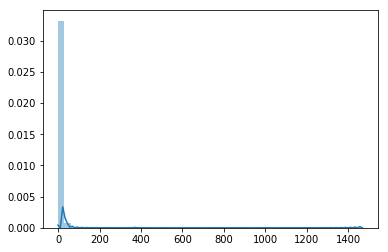

In [15]:
sns.distplot(np.array(df['LOS'].dropna()))

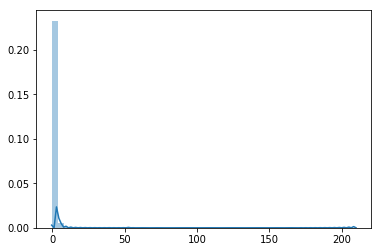

In [16]:
# Since LOS is highly skewed, standardize it into unit of week
df['LOS/Week'] = df['LOS']/7
sns.distplot(np.array(df['LOS/Week'].dropna()))

In [17]:
#Exclude patients are on dialysis already

In [18]:
df['DIALYSIS'].value_counts()

0.0    21509
2.0     1259
1.0      170
Name: DIALYSIS, dtype: int64

In [19]:
df = df.drop(df[df['DIALYSIS'] == 2.0].index)

In [20]:
df.shape

(21691, 179)

In [21]:
df['SMOKING'].value_counts()

2.0    9213
1.0    9020
0.0    3420
Name: SMOKING, dtype: int64

In [22]:
# Another classification of smoking status, maybe compared after implement a logistic model
df['CURRENTSMOKING'] = df['SMOKING'].map({0: 0, 1: 0, 2:1})

## df_demographics
drop nans

drop negative values

chi2 to select best features

In [23]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [24]:
df_demographics = df[[#General Features
                      'PATIENTID','PRIMPROCID',
                      #'LTFCALC', 'SURGMONTH', 'SURGYEAR', 'SURGWEEKDAY',
                      'GENDER', 'RACE', 'ETHNICITY', 'bmi', 'AGECAT',
                      #'LOS2', 'LOS', 'HTCM', 'WTKG', Converted features 
                      #'DEAD', 'PROC_SURVIVALDAYS', 'DCNOTHOME','LOS/Week', Unknown features before surgeries
                      #'LATESTLTFDAYS', Seems useless
                      'PRIMARYINSURER', 'TRANSFERALL',
                      #Demographic Features
                      'ANYSMOKE', 'HTN', 'ANYDM', 'ANYCAD', 'ANYCBGPCI', 'ANYCHF', 'ANYCOPD', 'DIALYSIS', 
                      'YNCREAT', 'ALLSTRESS', 'LIVING', 'PREOPAMBUL', 'ASACLASS', 'HGB', 'HXBYPASS', 'HXCEACAS', 
                      'HXANEURREP', 'HXPVI', 'HXMAJORAMP', 'ASAP2Y12ANT', 'PRE_OP_STATIN', 'ANYBB', 
                      'PRE_OP_ACE_I_ARB', 'PRE_OP_ANTICOAGULANT',
                      #'CURRENTSMOKING' instead of 'ANYSMOKING', 
                      #'CREATININE' instead of 'YNCREAT'
                      #Label
                      'AKI']]

In [25]:
nan_percentage = df_demographics.isna().sum()/df_demographics.shape[0]

In [26]:
nan_percentage.sort_values()

PATIENTID               0.000000
AGECAT                  0.000000
AKI                     0.000000
PRIMPROCID              0.000000
RACE                    0.000092
GENDER                  0.000323
HTN                     0.000369
HXBYPASS                0.000553
DIALYSIS                0.000553
ANYDM                   0.000599
ANYCHF                  0.000738
HXANEURREP              0.000738
ANYCOPD                 0.000876
HXPVI                   0.001106
ANYCAD                  0.001475
ASAP2Y12ANT             0.001521
HXMAJORAMP              0.001521
PRE_OP_STATIN           0.001660
ANYSMOKE                0.001752
ANYBB                   0.001982
ANYCBGPCI               0.002075
HXCEACAS                0.002536
TRANSFERALL             0.003273
ALLSTRESS               0.003642
LIVING                  0.004795
PREOPAMBUL              0.006639
ETHNICITY               0.007607
YNCREAT                 0.007699
bmi                     0.011064
HGB                     0.096031
ASACLASS  

In [27]:
df_demographics = df_demographics.dropna()

In [28]:
df_demographics.shape

(13545, 34)

In [29]:
df_demographics[(df_demographics < 0).any(1)]

,PATIENTID,PRIMPROCID,GENDER,RACE,ETHNICITY,bmi,AGECAT,PRIMARYINSURER,TRANSFERALL,ANYSMOKE,HTN,ANYDM,ANYCAD,ANYCBGPCI,ANYCHF,ANYCOPD,DIALYSIS,YNCREAT,ALLSTRESS,LIVING,PREOPAMBUL,ASACLASS,HGB,HXBYPASS,HXCEACAS,HXANEURREP,HXPVI,HXMAJORAMP,ASAP2Y12ANT,PRE_OP_STATIN,ANYBB,PRE_OP_ACE_I_ARB,PRE_OP_ANTICOAGULANT,AKI


In [30]:
#df_demographics = df_demographics.drop([14057])
#df_demographics.shape

In [31]:
df_demographics.head()

,PATIENTID,PRIMPROCID,GENDER,RACE,ETHNICITY,bmi,AGECAT,PRIMARYINSURER,TRANSFERALL,ANYSMOKE,HTN,ANYDM,ANYCAD,ANYCBGPCI,ANYCHF,ANYCOPD,DIALYSIS,YNCREAT,ALLSTRESS,LIVING,PREOPAMBUL,ASACLASS,HGB,HXBYPASS,HXCEACAS,HXANEURREP,HXPVI,HXMAJORAMP,ASAP2Y12ANT,PRE_OP_STATIN,ANYBB,PRE_OP_ACE_I_ARB,PRE_OP_ANTICOAGULANT,AKI
7,34,197672,2.0,5.0,0.0,27.281746,5,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,11.7,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0
37,92,100187,2.0,5.0,0.0,24.092971,3,2.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,15.4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1
75,210,109034,1.0,5.0,0.0,26.277285,3,3.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,14.1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0
111,306,234401,1.0,1.0,0.0,29.407596,4,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,3.0,13.6,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0
112,306,249659,1.0,1.0,0.0,29.407596,4,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,3.0,10.4,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0


## train test split and ordinary logistic regression

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
y_dempgraphics = df_demographics['AKI']

In [34]:
X_demographics = df_demographics.drop(columns = ['AKI'])
X_demographics.shape

(13545, 33)

In [35]:
X_demographics_train, X_demographics_test, y_demographics_train, y_demographics_test =train_test_split(
    X_demographics, y_dempgraphics, test_size=0.33, random_state=42)

In [36]:
y_demographics_train.value_counts()/len(y_demographics_train)

0    0.95449
1    0.04551
Name: AKI, dtype: float64

In [37]:
select_k_best_classifier = SelectKBest(chi2, k=20)
X_demographics_train_20 = pd.DataFrame(select_k_best_classifier.fit_transform(X_demographics_train, y_demographics_train))

In [38]:
select_k_best_classifier

SelectKBest(k=20, score_func=<function chi2 at 0x1a1ad9fb70>)

In [39]:
mask = select_k_best_classifier.get_support()

In [40]:
selected_k_features = X_demographics_train.columns[mask]

In [41]:
selected_k_features

Index(['PATIENTID', 'PRIMPROCID', 'bmi', 'AGECAT', 'TRANSFERALL', 'ANYDM',
       'ANYCAD', 'ANYCBGPCI', 'ANYCHF', 'DIALYSIS', 'YNCREAT', 'ALLSTRESS',
       'PREOPAMBUL', 'ASACLASS', 'HGB', 'HXCEACAS', 'HXMAJORAMP', 'ANYBB',
       'PRE_OP_ACE_I_ARB', 'PRE_OP_ANTICOAGULANT'],
      dtype='object')

In [46]:
X_demographics_train_20 = X_demographics_train[['PATIENTID', 'PRIMPROCID', 'bmi', 'AGECAT', 'TRANSFERALL', 'ANYDM',
                                                'ANYCAD', 'ANYCBGPCI', 'ANYCHF', 'DIALYSIS', 'YNCREAT', 'ALLSTRESS',
                                                'PREOPAMBUL', 'ASACLASS', 'HGB', 'HXCEACAS', 'HXMAJORAMP', 'ANYBB',
                                                'PRE_OP_ACE_I_ARB', 'PRE_OP_ANTICOAGULANT']]

In [48]:
X_demographics_train_20 = X_demographics_train_20.drop(X_demographics_train_20.columns[[0,1]], axis = 1)
X_demographics_train_20.head()

,bmi,AGECAT,TRANSFERALL,ANYDM,ANYCAD,ANYCBGPCI,ANYCHF,DIALYSIS,YNCREAT,ALLSTRESS,PREOPAMBUL,ASACLASS,HGB,HXCEACAS,HXMAJORAMP,ANYBB,PRE_OP_ACE_I_ARB,PRE_OP_ANTICOAGULANT
15989,30.536722,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,11.6,0.0,0.0,1.0,1.0,1.0
13324,27.458654,6,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,10.4,0.0,0.0,1.0,1.0,0.0
18622,36.730946,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,13.2,0.0,0.0,0.0,1.0,0.0
11368,19.707964,5,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0,11.0,0.0,2.0,1.0,0.0,0.0
6569,25.103878,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,13.3,0.0,0.0,1.0,0.0,0.0


In [49]:
X_demographics_test_20 = X_demographics_test[['bmi', 'AGECAT', 'TRANSFERALL', 'ANYDM',
                                              'ANYCAD', 'ANYCBGPCI', 'ANYCHF', 'DIALYSIS', 'YNCREAT', 'ALLSTRESS',
                                              'PREOPAMBUL', 'ASACLASS', 'HGB', 'HXCEACAS', 'HXMAJORAMP', 'ANYBB',
                                              'PRE_OP_ACE_I_ARB', 'PRE_OP_ANTICOAGULANT']]
X_demographics_test_20.head()

,bmi,AGECAT,TRANSFERALL,ANYDM,ANYCAD,ANYCBGPCI,ANYCHF,DIALYSIS,YNCREAT,ALLSTRESS,PREOPAMBUL,ASACLASS,HGB,HXCEACAS,HXMAJORAMP,ANYBB,PRE_OP_ACE_I_ARB,PRE_OP_ANTICOAGULANT
8196,23.722811,6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,14.9,0.0,0.0,1.0,1.0,0.0
23159,28.282828,6,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,3.0,14.2,1.0,0.0,1.0,1.0,1.0
22065,27.471707,3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,14.0,0.0,0.0,0.0,0.0,0.0
17558,25.711662,3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,3.0,13.7,0.0,0.0,1.0,1.0,0.0
15289,37.500000,7,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,8.2,0.0,0.0,0.0,1.0,0.0


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [65]:
clf = LogisticRegression(class_weight = {0: 0.05, 1:0.95}).fit(X_demographics_train_20, y_demographics_train)

/Users/Chen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [66]:
predy = clf.predict(X_demographics_test_20)
print(confusion_matrix(y_demographics_test, predy))

[[3141 1125]
 [  73  131]]


In [67]:
print(classification_report(y_demographics_test, predy))

              precision    recall  f1-score   support

           0       0.98      0.74      0.84      4266
           1       0.10      0.64      0.18       204

   micro avg       0.73      0.73      0.73      4470
   macro avg       0.54      0.69      0.51      4470
weighted avg       0.94      0.73      0.81      4470



In [54]:
clf.score(X_demographics_test_20, y_demographics_test)

0.8973154362416107

In [57]:
clf.predict_proba(X_demographics_test_20)

array([[0.81214453, 0.18785547],
       [0.60036111, 0.39963889],
       [0.88016184, 0.11983816],
       ...,
       [0.65110658, 0.34889342],
       [0.51135756, 0.48864244],
       [0.63113741, 0.36886259]])

In [465]:
clf_all = LogisticRegression(class_weight = {0: 0.08, 1:0.92}).fit(X_demographics_train, y_demographics_train)

/Users/Chen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [466]:
clf_all.score(X_demographics_test, y_demographics_test)

0.8646532438478747

In [467]:
clf.coef_

array([[ 0.0236923 ,  0.08073387,  0.41948331,  0.30504171,  0.02234586,
         0.06760144,  0.26935347,  1.18218798,  0.98003171,  0.18156972,
         0.25353837,  0.24487301, -0.16619345,  0.33147833, -0.06233842,
         0.18527497,  0.36322155, -0.02170742]])

In [468]:
clf_all.predict(X_demographics_test).sum()

531

In [469]:
t = X_demographics_train[['AGECAT', 'bmi', 'ANYCAD']]
t_test = X_demographics_test[['AGECAT', 'bmi', 'ANYCAD']]

In [470]:
clf_t = LogisticRegression(class_weight = {0: 0.1, 1:0.9}).fit(t, y_demographics_train)

/Users/Chen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [471]:
clf_t.score(t_test, y_demographics_test)

0.9519015659955258

In [472]:
clf_t.predict(t_test).sum()

11

# GEE & logistic regression

In [434]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [435]:
df.head()

,PATIENTID,PRIMPROCID,LTFCALC,SURGMONTH,SURGYEAR,SURGWEEKDAY,SSDI_MORTYEAR,VQI_MORTYEAR,ALL_MORTYEAR,DEAD,GENDER,RACE,ETHNICITY,HTIN,HTCM,WTLB,WTKG,AGE,AGECAT,LOS,LOS2,PROC_SURVIVALDAYS,LATESTLTFDAYS,PRIMARYINSURER,DCSTATUS,DCNOTHOME,TRANSFER,TRANSFERALL,SMOKING,ANYSMOKE,HTN,DIABETES,ANYDM,HBA1C,CAD,ANYCAD,CABG,PCI,ANYCBGPCI,CHF,ANYCHF,COPD,ANYCOPD,DIALYSIS,CREATININE,CREATININE_UMOL,YNCREAT,STRESS,ALLSTRESS,LIVING,PREOPAMBUL,ASACLASS,HGB,HEMO_L,HXBYPASS,HXCEACAS,HXANEURREP,HXPVI,HXMAJORAMP,PRE_OP_ASA,PRE_OP_P2Y12_ANTAGONIST,ASAP2Y12ANT,PRE_OP_STATIN,PRE_OP_BETA_BLOCKER,ANYBB,PRE_OP_ACE_I_ARB,PRE_OP_ANTICOAGULANT,INDICATIONRT,INDICATIONLT,PATHOLOGYRT,PATHOLOGYLT,PINBYPASSR,PINBYPASSL,PINPTASTENTR,PINPTASTENTL,PLEGBYPASSR,PLEGBYPASSL,PLEGPTASTENTR,PLEGPTASTENTL,PMAJAMPR,PMAJAMPL,PMINAMPR,PMINAMPL,PREOPABIR,PREOPABIL,PREOPTBIR,PREOPTBIL,PREDUPLEX,PREMRA,PRECTA,PREARTERIO,PREVEINMAP,URGENCY,ANESTHESIA,SIDE,SKINPREP,GRAFTORIGIN,GRAFTRECIPIENT,GRAFTVEINTYPE,VEINSEGS,PROSTHETIC,EBL,GROIN_INCISION,TOTALPROCTIME,VEIN_HARVEST_INCISION,VEIN_GRAFT_LOCATION,VEINCUFF,SEQGRAFT,CCPVI,CCENDAR,CCSUPRAINGUINAL,DOPPLER,DUPLEX,ARTERIOGRAM,WOUND,GRFTINFECTION,TRANSFUSION,YNTRANSFX,NEWMI,ANYPOMI,DYSRHYTHMIA,CHF2,RESPIRATORY,CHGRENAL,STROKE,IPSAMP,DCPATENCY,DCPATJUDGE,RTOR,ORBLEED,ORTHROMB,ORINFECTION,ORREVISION,POCX_INFRA,DISCHARGE_ASA,DISCHARGE_STATIN,DISCHARGE_P2Y12_ANTAGONIST,DISCHARGE_BETA_BLOCKER,DISCHARGE_ACE_I_ARB,DISCHARGE_ANTICOAGULANT,POSTOPABIR,POSTOPABIL,POSTOPTBIR,POSTOPTBIL,DCAMBUL,ABXSTART,ABXSTOP,ABXCEPH,SURGEONID,CENTERID,REGIONID,CONTACTBY,LTFSMOKING,LTFSTATUS,MORTCAUSE,LTF_ASA,LTF_P2Y12_ANTAGONIST,LTF_ANTICOAGULANT,LTF_BETA_BLOCKER,LTF_STATIN,LTF_ACE_I_ARB,LTFCURRAMB,LTFIPSSYMP,LTFCURPATENCY,LTFCURPATENCYDAYS,LTFPATJUDGE,LTFIPSABI,LTFIPSTBI,LTFINFECTION,LTFREVISION,LTFREVISIONDAYS,LTFTHROMBREVISION,LTFTHROMBREVISIONDAYS,LTFMAJAMP,LTFMAJAMPDAYS,STROKEORDEATH,AKI,bmi,LOS/Week,CURRENTSMOKING
0,6,13428,1,12,2009,6,NaN,NaN,NaN,0,2.0,5.0,0.0,64.0,163.0,211.0,96.0,61,4,5.0,5.0,1898,305.0,NaN,1.0,0.0,0.0,0.0,2.0,1.0,1.0,2.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.9,79.56,0.0,2.0,2.0,1.0,1.0,3.0,13.8,138.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.66,0.49,0.42,1.0,0.0,0.0,1.0,1.0,1.0,3.0,2.0,NaN,2.0,3.0,1.0,1.0,0.0,300.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,1.0,NaN,0.0,0.98,0.94,0.60,0.46,1.0,1.0,1.0,1.0,9,1,21.0,1.0,1.0,1.0,NaN,1.0,0.0,NaN,1.0,1.0,NaN,1.0,0.0,1.0,305.0,4.0,0.90,0.55,0.0,0.0,305.0,0.0,305.0,0.0,305.0,NaN,0,36.132335,0.714286,1.0
1,6,38228,0,11,2011,6,NaN,NaN,NaN,0,2.0,5.0,0.0,66.0,168.0,209.0,95.0,63,4,3.0,3.0,1205,53.0,NaN,1.0,0.0,0.0,0.0,2.0,1.0,1.0,2.0,1.0,6.9,1.0,1.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,88.40,0.0,0.0,0.0,1.0,1.0,3.0,11.0,110.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,1.0,NaN,NaN,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.4,0.95,0.25,0.70,1.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,1.0,5.0,4.0,5.0,1.0,0.0,250.0,0.0,330.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,1.0,NaN,0.0,0.90,0.87,0.64,0.54,1.0,1.0,1.0,1.0,9,1,21.0,1.0,1.0,1.0,NaN,1.0,0.0,NaN,1.0,1.0,NaN,1.0,0.0,1.0,53.0,4.0,0.92,0.64,0.0,0.0,53.0,0.0,53.0,0.0,53.0,0.0,0,33.659297,0.428571,1.0
2,8,6,0,2,2009,3,NaN,NaN,NaN,0,1.0,5.0,0.0,75.0,191.0,279.0,127.0,68,4,17.0,9.0,2202,9.0,NaN,3.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.3,114.92,0.0,0.0,0.0,1.0,1.0,3.0,12.3,123.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,NaN,NaN,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,1.0,3.0,1.0,NaN,5.0,7.0,1.0,1.0,0.0,150.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN

In [436]:
X_demographics_train.shape, X_demographics_test.shape, y_demographics_train.shape, y_demographics_test.shape

((9075, 33), (4470, 33), (9075,), (4470,))

In [437]:
X_demographics_train_20.shape, X_demographics_test_20.shape

((9075, 18), (4470, 18))

## RF and GB including randomsearch and gridsearch

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

In [111]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [112]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestClassifier(random_state = 42)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [92]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_demographics_train, y_demographics_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 70.7min finished


In [93]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [94]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [None, 10, 30],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [3, 5, 10],
    'n_estimators': [500, 1000, 2000, 3000]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

In [95]:
# Fit the grid search to the data
grid_search.fit(X_demographics_train, y_demographics_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 134.7min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 172.1min
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed: 193.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True, False], 'max_depth': [None, 10, 30], 'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [3, 5, 10], 'n_estimators': [500, 1000, 2000, 3000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [96]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 500}

In [97]:
final_rf_model = grid_search.best_estimator_

In [103]:
pred_rf_y = final_rf_model.predict(X_demographics_test)
pred_rf_y

array([0.04502246, 0.09241795, 0.01412925, ..., 0.03836894, 0.06197436,
       0.06640205])

In [102]:
len(pred_rf_y)

4470

In [105]:
y_demographics_train.sum()

413

In [106]:
clf = RandomForestClassifier(n_estimators=1000, max_depth=50,random_state=0)

In [107]:
clf.fit(X_demographics_train_20, y_demographics_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [81]:
clf.score(X_demographics_test_20, y_demographics_test)

0.9543624161073826

In [108]:
predy = clf.predict(X_demographics_test_20)

In [109]:
print(confusion_matrix(y_demographics_test, predy))

[[4263    3]
 [ 201    3]]


In [110]:
print(classification_report(y_demographics_test, predy))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      4266
           1       0.50      0.01      0.03       204

   micro avg       0.95      0.95      0.95      4470
   macro avg       0.73      0.51      0.50      4470
weighted avg       0.93      0.95      0.93      4470



In [243]:
data = sm.datasets.get_rdataset('epil', package='MASS').data

In [255]:
data.head()

,y,trt,base,age,V4,subject,period,lbase,lage
0,5,placebo,11,31,0,1,1,-0.756354,0.114204
1,3,placebo,11,31,0,1,2,-0.756354,0.114204
2,3,placebo,11,31,0,1,3,-0.756354,0.114204
3,3,placebo,11,31,1,1,4,-0.756354,0.114204
4,3,placebo,11,30,0,2,1,-0.756354,0.081414


In [253]:
family = sm.families.Binomial()
va = sm.cov_struct.Autoregressive()

In [254]:
mod = smf.gee("y ~ age + trt + base", "subject", data, cov_struct=ind, family=fam)

In [265]:
res = mod.fit()
print(res.summary())

                               GEE Regression Results                              
Dep. Variable:                           y   No. Observations:                  236
Model:                                 GEE   No. clusters:                       59
Method:                        Generalized   Min. cluster size:                   4
                      Estimating Equations   Max. cluster size:                   4
Family:                            Poisson   Mean cluster size:                 4.0
Dependence structure:         Exchangeable   Num. iterations:                    51
Date:                     Tue, 13 Nov 2018   Scale:                           1.000
Covariance type:                    robust   Time:                         18:02:08
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.5730      0.361      1.589      0.112      -0.134  

## Feature extraction using lasso/ridge
## test for collinearity

## try for some plot & EDA

In [50]:
import numpy as np

In [51]:
df1 = df[['ANYSMOKE', 'CHGRENAL']]
df1 = df1.dropna()
x1 = np.array(df1['ANYSMOKE'])
y1 = np.array(df1['CHGRENAL'])

In [57]:
len(x1)

22913

In [65]:
df1['CHGRENAL'].value_counts()

0.0    21843
1.0      783
4.0      165
2.0       62
3.0       60
Name: CHGRENAL, dtype: int64

In [60]:
import matplotlib.pyplot as plt

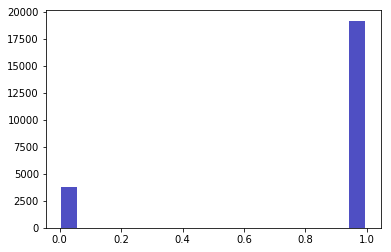

In [61]:
n, bins, patches = plt.hist(x=x1, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

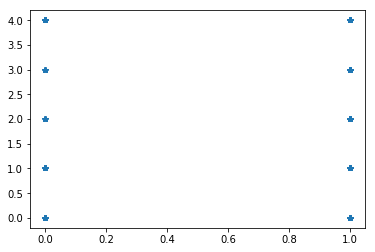

In [63]:
plt.plot(x1, y1,'*')

In [80]:
import numpy as np
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3)

[(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
Categories (3, interval[float64]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]]